In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
sns.set_theme(style="whitegrid")
diamonds = sns.load_dataset("diamonds")

In [140]:
df = pd.read_csv('datasets_results.csv')
df

,dataset_name,dataset_nrows,dataset_ncolumns,tpot_score,quick_score,tpot_time,quick_time
0,analcatdata_asbestos,83,3,0.714286,0.714286,21.998906,19.426830
1,iris,150,4,1.000000,0.973684,30.192648,12.650085
2,horse_colic,368,22,0.815217,0.782609,31.797737,17.840938
3,parity5,32,5,1.000000,0.375000,18.685671,12.630604
4,hepatitis,155,19,0.769231,0.820513,36.381937,20.559646
5,schizo,340,14,0.541176,0.576471,41.662166,13.641392
6,yeast,1479,8,0.624324,0.624324,224.564583,19.128754
7,coil2000,9822,85,0.940554,0.940554,1225.981133,273.451327
8,vowel,990,13,0.979839,0.907258,136.267690,34.270761
9,tic_tac_toe,958,9,0.987500,0.941667,119.623557,28.608808


## Diferença menor do que 5%

In [84]:
score_diff = df['tpot_score'] - df['quick_score']
few_diff_score_df = df[score_diff < 0.05]
few_diff_score_df = few_diff_score_df[few_diff_score_df['tpot_score'] - few_diff_score_df['quick_score'] >= 0]

In [134]:
score_diff = (few_diff_score_df['tpot_score'] - few_diff_score_df['quick_score']) * 100
time_diff = (few_diff_score_df['tpot_time'] - few_diff_score_df['quick_time']) / 100

time_and_score_comparison = pd.DataFrame({'score_diff': score_diff, 'time_diff': time_diff})

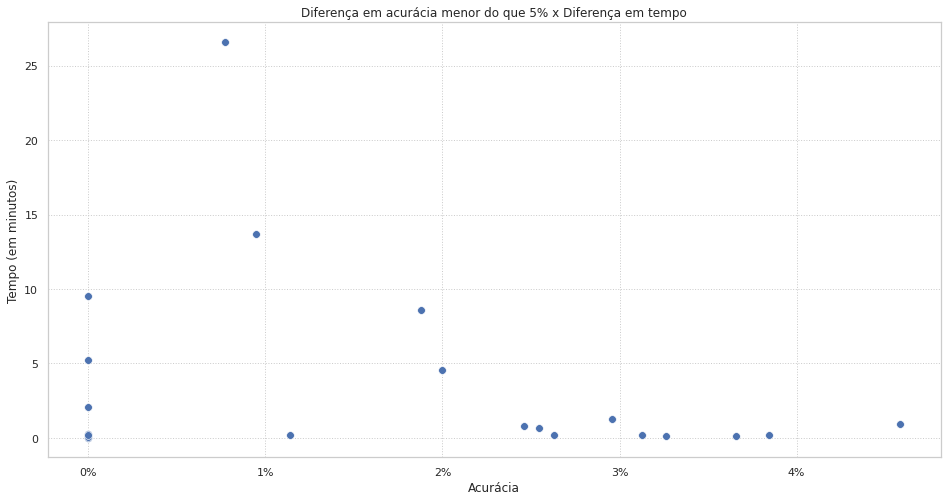

In [136]:
fig, ax = plt.subplots(figsize=(16,8))
sns.scatterplot(data=time_and_score_comparison, x='score_diff', y='time_diff', s=60)
plt.grid(linestyle='dotted')
plt.title('Diferença em acurácia menor do que 5% x Diferença em tempo')
plt.xlabel('Acurácia')
plt.xticks(ticks=[0,1,2,3,4], labels=['0%','1%','2%','3%','4%'])
plt.ylabel('Tempo (em minutos)')
plt.show()
fig.savefig('score_and_time_diff.png')

## Tamanho do dataset x Tempo de execução

In [101]:
df.head()

,dataset_name,dataset_nrows,dataset_ncolumns,tpot_score,quick_score,tpot_time,quick_time
0,analcatdata_asbestos,83,3,0.714286,0.714286,21.998906,19.426830
1,iris,150,4,1.000000,0.973684,30.192648,12.650085
2,horse_colic,368,22,0.815217,0.782609,31.797737,17.840938
3,parity5,32,5,1.000000,0.375000,18.685671,12.630604
4,hepatitis,155,19,0.769231,0.820513,36.381937,20.559646


In [111]:
dimensionality = df['dataset_nrows'] * df['dataset_ncolumns']
dimensionality_vs_time_df = pd.DataFrame({'dimensionality': dimensionality, 
                                          'tpot_time': df['tpot_time'] / 60,
                                          'quick_time': df['quick_time'] / 60})

In [112]:
dimensionality_vs_time_df

,dimensionality,tpot_time,quick_time
0,249,0.366648,0.323780
1,600,0.503211,0.210835
2,8096,0.529962,0.297349
3,160,0.311428,0.210510
4,2945,0.606366,0.342661
5,4760,0.694369,0.227357
6,11832,3.742743,0.318813
7,834870,20.433019,4.557522
8,12870,2.271128,0.571179
9,8622,1.993726,0.476813


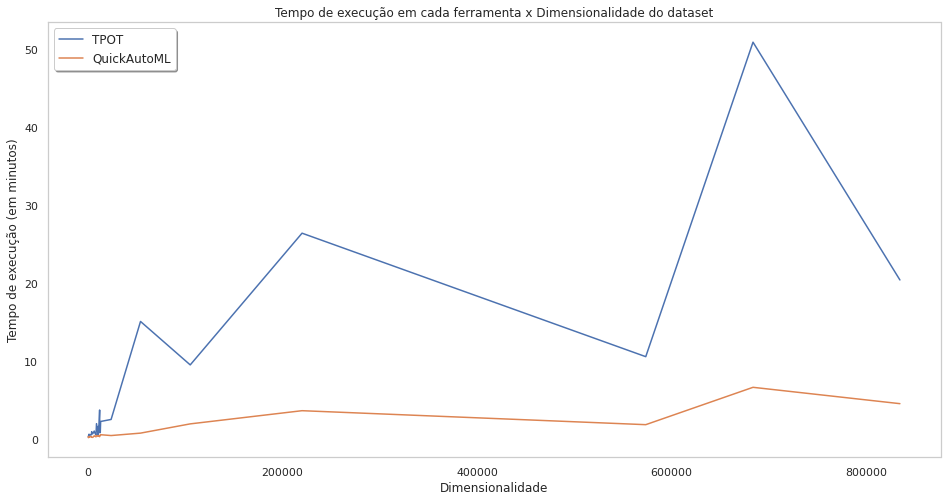

In [139]:
fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(data=dimensionality_vs_time_df, x='dimensionality', y='tpot_time', ax=ax, label="TPOT")
sns.lineplot(data=dimensionality_vs_time_df, x='dimensionality', y='quick_time', ax=ax, label="QuickAutoML")
legend = ax.legend(loc='upper left', shadow=True, fontsize='medium')
plt.grid(None)
plt.title('Tempo de execução em cada ferramenta x Dimensionalidade do dataset')
plt.xlabel('Dimensionalidade')
plt.ylabel('Tempo de execução (em minutos)')
plt.show()
fig.savefig('dimensionality_vs_time.png')